In [1]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('Smoking Data.csv')

In [4]:
df.head()

,region,age,sex,bmi,children,smoker
0,southwest,19,female,27.900,0,yes
1,southeast,18,male,33.770,1,no
2,southeast,28,male,33.000,3,no
3,northwest,33,male,22.705,0,no
4,northwest,32,male,28.880,0,no


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   region    1338 non-null   object 
 1   age       1338 non-null   int64  
 2   sex       1338 non-null   object 
 3   bmi       1338 non-null   float64
 4   children  1338 non-null   int64  
 5   smoker    1338 non-null   object 
dtypes: float64(1), int64(2), object(3)
memory usage: 62.8+ KB


In [7]:
df.shape

(1338, 6)

# Label Encoder

In [8]:
from sklearn.preprocessing import LabelEncoder

In [9]:
le = LabelEncoder()

In [10]:
df.region = le.fit_transform(df['region'])
df.sex = le.fit_transform(df['sex'])
df.smoker = le.fit_transform(df['smoker'])

In [11]:
df.head()

,region,age,sex,bmi,children,smoker
0,3,19,0,27.900,0,1
1,2,18,1,33.770,1,0
2,2,28,1,33.000,3,0
3,1,33,1,22.705,0,0
4,1,32,1,28.880,0,0


In [12]:
x = df.drop('smoker', axis=1)
y = df['smoker']

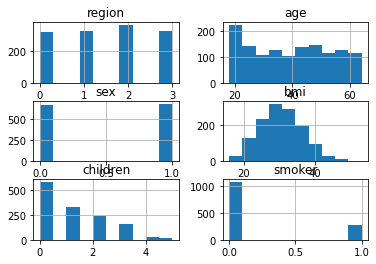

In [13]:
p = df.hist()

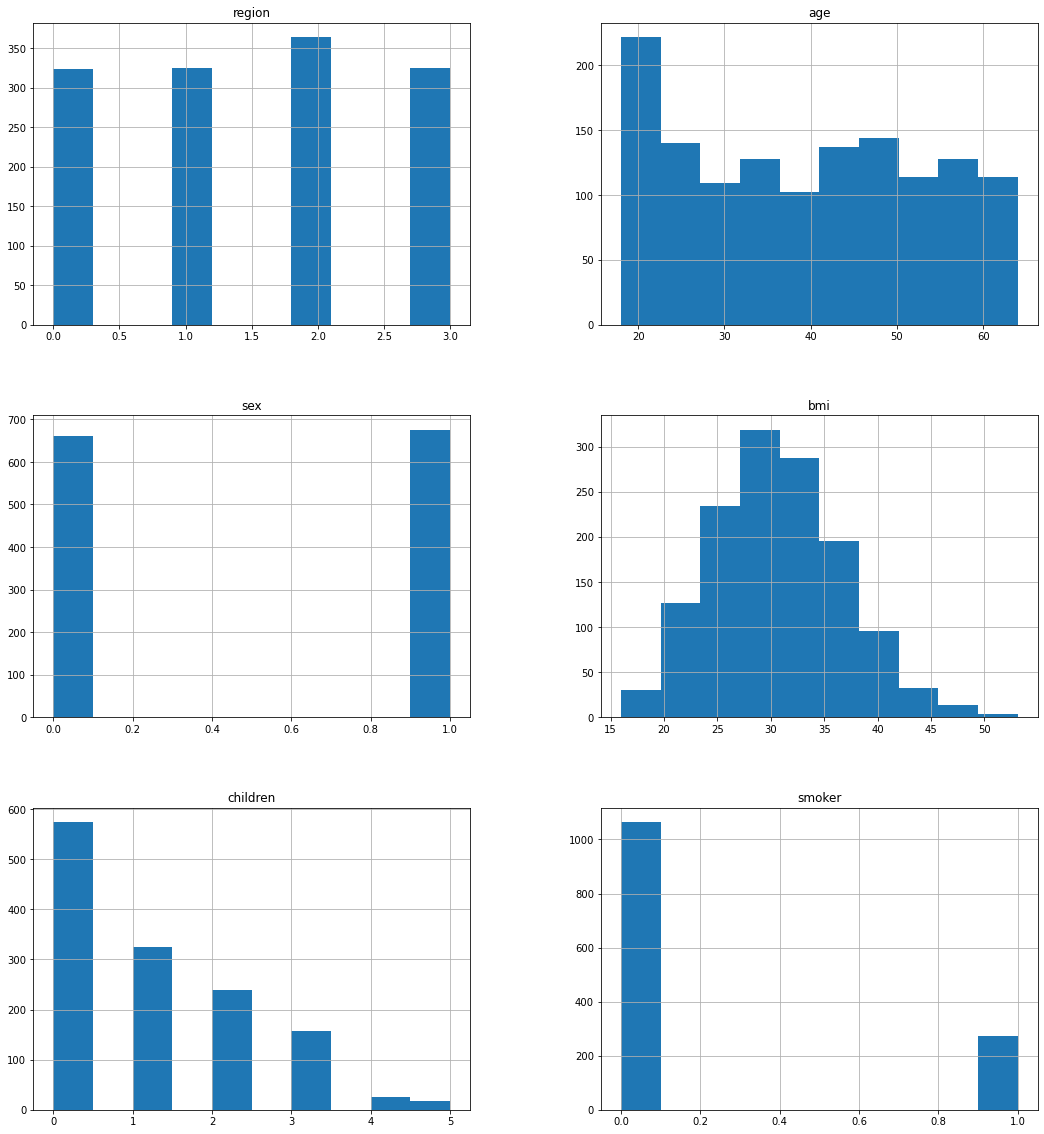

In [14]:
p = df.hist(figsize=(18,20))

# Training & Testing Model

In [15]:
from sklearn.model_selection import train_test_split
x_train,x_test, y_train, y_test = train_test_split (x,y, test_size=.30, random_state=42, stratify=y)

In [18]:
from sklearn.neighbors import KNeighborsClassifier


test_scores = []
train_scores = []

for i in range(1,15):

    knn = KNeighborsClassifier(i)
    knn.fit(x_train,y_train)
    
    train_scores.append(knn.score(x_train,y_train))
    test_scores.append(knn.score(x_test,y_test))

In [19]:
print(train_scores)
print(test_scores)

[1.0, 0.8482905982905983, 0.8536324786324786, 0.8108974358974359, 0.8173076923076923, 0.8098290598290598, 0.8055555555555556, 0.8034188034188035, 0.7991452991452992, 0.7970085470085471, 0.7970085470085471, 0.7959401709401709, 0.7948717948717948, 0.7948717948717948]
[0.6965174129353234, 0.7711442786069652, 0.7263681592039801, 0.7835820895522388, 0.7587064676616916, 0.7761194029850746, 0.7611940298507462, 0.7860696517412935, 0.7810945273631841, 0.7910447761194029, 0.7860696517412935, 0.7960199004975125, 0.7960199004975125, 0.7960199004975125]


In [21]:
max_test_score = max(test_scores)
test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
print('Max test score {} % and k = {}'.format(max_test_score*100,list(map(lambda x: x+1, test_scores_ind))))

Max test score 79.60199004975125 % and k = [12, 13, 14]


C:\Users\Maruf\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Maruf\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


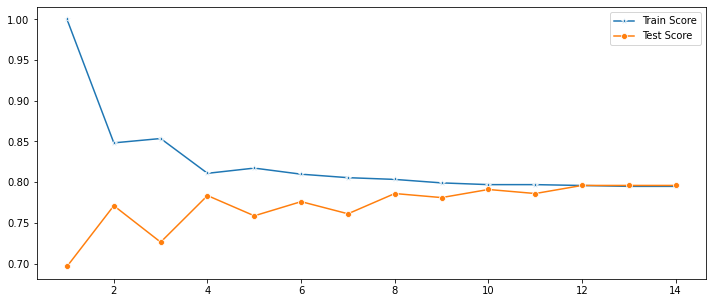

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12,5))
p = sns.lineplot(range(1,15),train_scores,marker='*',label='Train Score')
p = sns.lineplot(range(1,15),test_scores,marker='o',label='Test Score')

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [27]:
knn = KNeighborsClassifier(11)
knn.fit(x_train,y_train)
knn.score(x_test,y_test)

0.7860696517412935

# Confusion Matrix

In [30]:
from sklearn.metrics import confusion_matrix
y_pred = knn.predict(x_test)
pl = confusion_matrix(y_test,y_pred)

<AxesSubplot:>

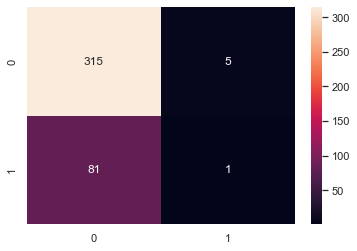

In [32]:
sns.heatmap(pl, annot=True, fmt='g')

In [33]:
from sklearn.metrics import classification_report
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.98      0.88       320
           1       0.17      0.01      0.02        82

    accuracy                           0.79       402
   macro avg       0.48      0.50      0.45       402
weighted avg       0.67      0.79      0.71       402



In [34]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
# fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
y_pred_prob = knn.predict_proba(x_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
auc = roc_auc_score(y_test, y_pred_prob)
print(auc)

0.5134717987804878


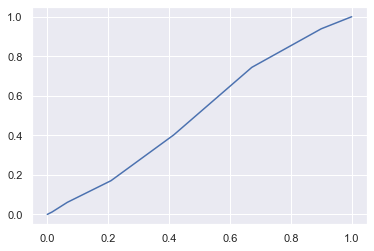

In [35]:
plt.plot (fpr, tpr)

In [36]:
from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors':np.arange(1,50)}
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(x,y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [37]:
print("Best Score:" + str(knn_cv.best_score_))
print("Best Parameters: " + str(knn_cv.best_params_))

Best Score:0.795964000223601
Best Parameters: {'n_neighbors': 16}
